In [1]:
%reload_ext autoreload
%autoreload 2

from fastai import *
from fastai.vision import *

# Dogs and cats

## Resnet 34

In [2]:
path = untar_data(URLs.DOGS)
# path.ls()

[PosixPath('/home/tom/.fastai/data/dogscats/train'),
 PosixPath('/home/tom/.fastai/data/dogscats/valid'),
 PosixPath('/home/tom/.fastai/data/dogscats/sample'),
 PosixPath('/home/tom/.fastai/data/dogscats/test1'),
 PosixPath('/home/tom/.fastai/data/dogscats/models')]

In [3]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), test='test1', size=224)

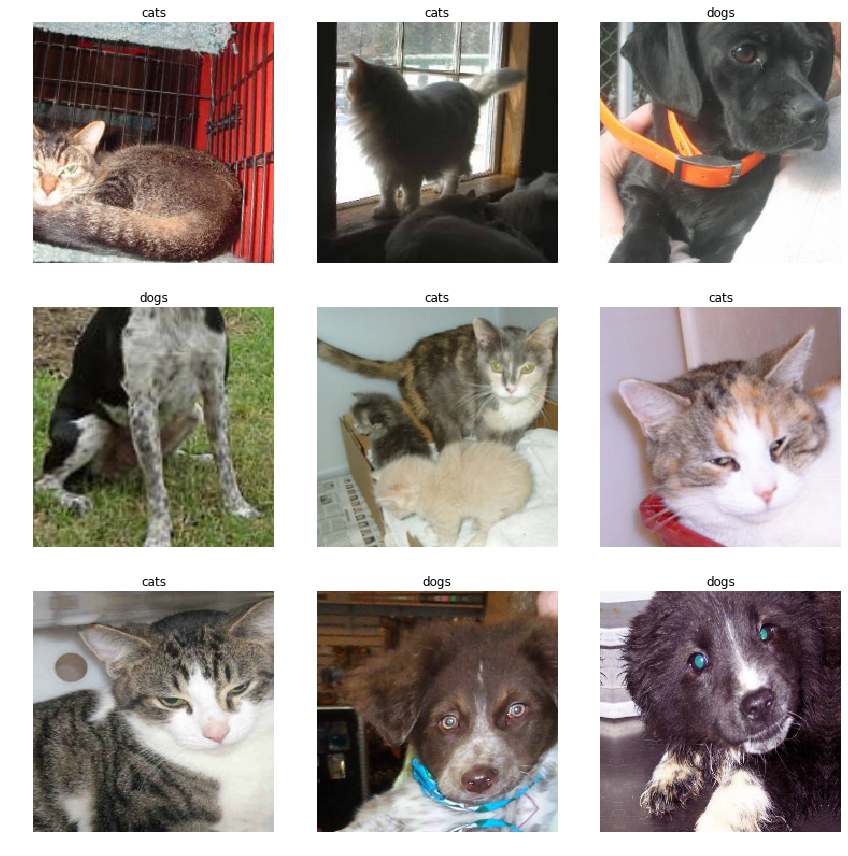

In [4]:
data.show_batch(3)

In [5]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy
1,0.067119,0.025844,0.989000
2,0.047690,0.022421,0.991500


In [6]:
learn.save('model')

In [9]:
val_preds = learn.TTA()

In [10]:
print(accuracy(*val_preds))

tensor(0.9940)


In [11]:
log_preds, y = learn.TTA(ds_type=DatasetType.Test)
probs = np.exp(log_preds)
probs.shape

torch.Size([12500, 2])

In [12]:
accuracy(log_preds, y)

tensor(0.4969)

In [13]:
log_preds

tensor([[1.0419e-04, 9.9990e-01],
        [7.3802e-02, 9.2620e-01],
        [2.0163e-04, 9.9980e-01],
        ...,
        [6.3477e-02, 9.3652e-01],
        [3.2624e-04, 9.9967e-01],
        [1.5015e-02, 9.8499e-01]])

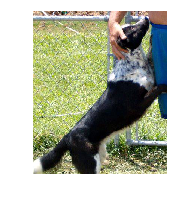

In [21]:
show_image(open_image(path/"test1/4650.jpg"))

In [22]:
data.classes[torch.argmax(log_preds[4650])]

'dogs'

In [27]:
learn.predict(open_image(path/"test1/4650.jpg"))[2]

tensor([0.0014, 0.9986])